In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import files
import io

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv
User uploaded file "healthcare-dataset-stroke-data.csv" with length 316971 bytes


In [4]:
df = df.dropna()  # Remove any rows with missing values

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['gender', 'smoking_status', 'work_type', 'Residence_type', 'ever_married'], drop_first=True)

# Separate features and target
X = df.drop('stroke', axis=1).values
y = df['stroke'].values

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for RNN (samples, time steps, features)
X_scaled = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
model_rnn = Sequential()

# Add RNN layer
model_rnn.add(SimpleRNN(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# Dropout layer to prevent overfitting
model_rnn.add(Dropout(0.2))

# Output layer
model_rnn.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_rnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model_rnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         3,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,451 (13.48 KB)

 Trainable params: 3,451 (13.48 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Define LSTM Model
model_lstm = Sequential()

# Add LSTM layer
model_lstm.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# Dropout layer to prevent overfitting
model_lstm.add(Dropout(0.2))

# Output layer
model_lstm.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        13,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,651 (53.32 KB)

 Trainable params: 13,651 (53.32 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model_gru = Sequential()

# Add GRU layer
model_gru.add(GRU(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# Dropout layer to prevent overfitting
model_gru.add(Dropout(0.2))

# Output layer
model_gru.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_gru.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model_gru.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50)             │        10,350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,401 (40.63 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train RNN Model
history_rnn = model_rnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Train LSTM Model
history_lstm = model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Train GRU Model
history_gru = model_gru.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6213 - loss: 0.6664 - val_accuracy: 0.9389 - val_loss: 0.3488
Epoch 2/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9436 - loss: 0.3000 - val_accuracy: 0.9470 - val_loss: 0.2110
Epoch 3/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9519 - loss: 0.1923 - val_accuracy: 0.9460 - val_loss: 0.1787
Epoch 4/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9596 - loss: 0.1534 - val_accuracy: 0.9460 - val_loss: 0.1729
Epoch 5/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9611 - loss: 0.1457 - val_accuracy: 0.9460 - val_loss: 0.1712
Epoch 6/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9557 - loss: 0.1517 - val_accuracy: 0.9460 - val_loss: 0.1705
Epoch 7/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9607 - loss: 0.1341 - val_accuracy: 0.9460 - val_loss: 0.1686
Epoch 8/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9589 - loss: 0.1460 - val_accuracy: 0.

In [10]:
test_loss_rnn, test_accuracy_rnn = model_rnn.evaluate(X_test, y_test)

# Evaluate LSTM Model
test_loss_lstm, test_accuracy_lstm = model_lstm.evaluate(X_test, y_test)

# Evaluate GRU Model
test_loss_gru, test_accuracy_gru = model_gru.evaluate(X_test, y_test)

# Print results
print(f"RNN Accuracy: {test_accuracy_rnn:.4f}")
print(f"LSTM Accuracy: {test_accuracy_lstm:.4f}")
print(f"GRU Accuracy: {test_accuracy_gru:.4f}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9467 - loss: 0.1748
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9453 - loss: 0.1789
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9463 - loss: 0.1766
RNN Accuracy: 0.9460
LSTM Accuracy: 0.9450
GRU Accuracy: 0.9450


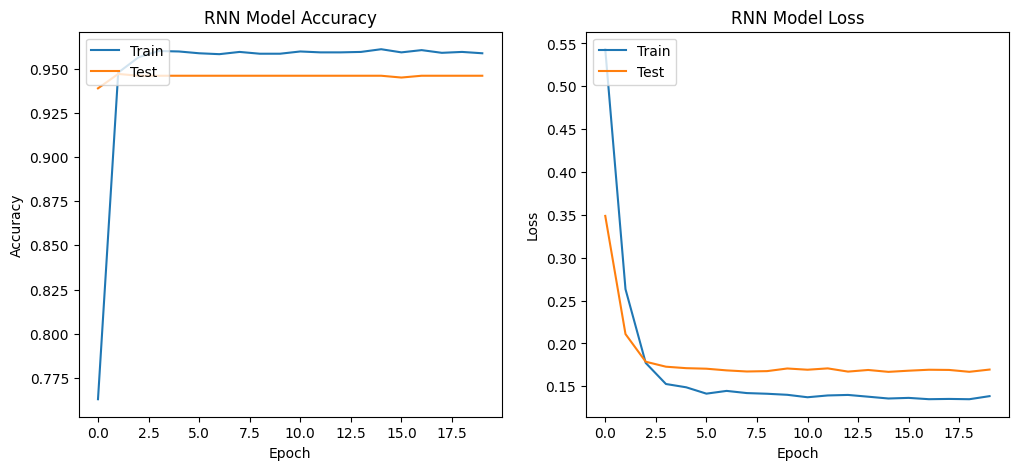

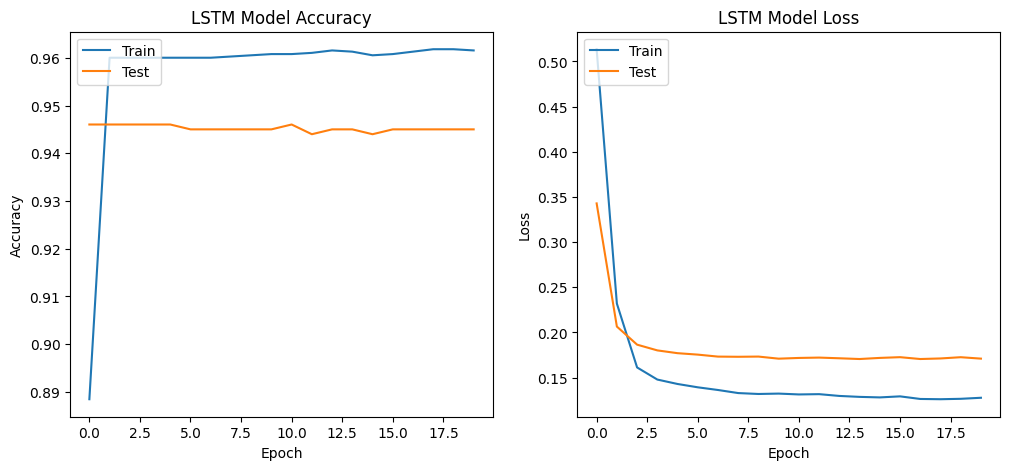

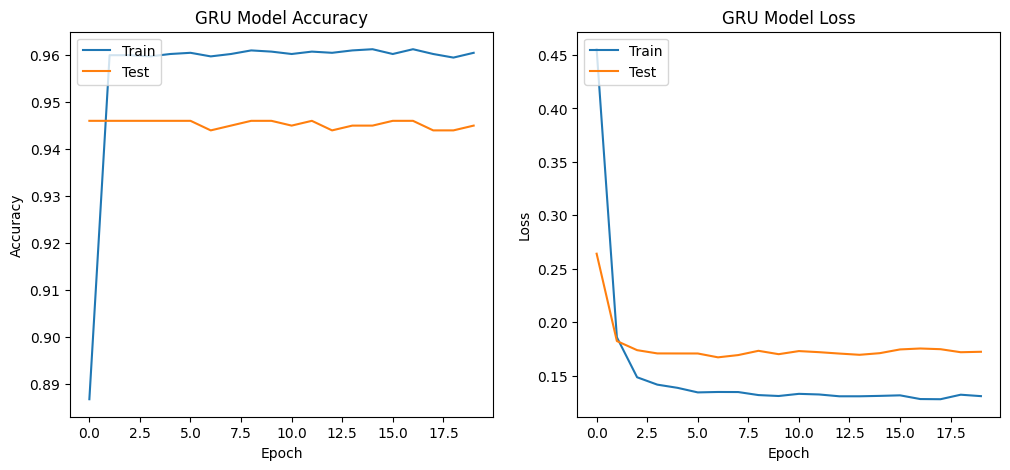

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy and loss for RNN
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'])
plt.plot(history_rnn.history['val_accuracy'])
plt.title('RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Plot training and validation accuracy and loss for LSTM
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Plot training and validation accuracy and loss for GRU
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_gru.history['accuracy'])
plt.plot(history_gru.history['val_accuracy'])
plt.title('GRU Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('GRU Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [12]:
from sklearn.metrics import classification_report

# Evaluate RNN Model and print classification report
y_pred_rnn = (model_rnn.predict(X_test) > 0.5).astype("int32")
print("RNN Model Evaluation:")
print(classification_report(y_test, y_pred_rnn))

# Evaluate LSTM Model and print classification report
y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype("int32")
print("LSTM Model Evaluation:")
print(classification_report(y_test, y_pred_lstm))

# Evaluate GRU Model and print classification report
y_pred_gru = (model_gru.predict(X_test) > 0.5).astype("int32")
print("GRU Model Evaluation:")
print(classification_report(y_test, y_pred_gru))

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
RNN Model Evaluation:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
LSTM Model Evaluation:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.33      0.02      0.04        53

    accuracy                           0.95       982
   macro avg       0.64      0.51      0.50       982
weighted avg       0.91      0.95      0.92       982

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
GRU Model Evaluation:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



In [14]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,ever_married_Yes
0,9046,67.0,0,1,228.69,36.6,1,True,False,True,False,False,False,True,False,False,True,True
2,31112,80.0,0,1,105.92,32.5,1,True,False,False,True,False,False,True,False,False,False,True
3,60182,49.0,0,0,171.23,34.4,1,False,False,False,False,True,False,True,False,False,True,True
4,1665,79.0,1,0,174.12,24.0,1,False,False,False,True,False,False,False,True,False,False,True
5,56669,81.0,0,0,186.21,29.0,1,True,False,True,False,False,False,True,False,False,True,True
